# Python検定データ分析

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 第1回模試

### No.17

In [18]:
a = np.full((1, 5), np.e).T.ravel()
a

array([2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183])

In [19]:
b = np.linspace(0, 1, 5)
b

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [20]:
#横に連結
c = np.hstack([a, b])
c

array([2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       0.        , 0.25      , 0.5       , 0.75      , 1.        ])

In [21]:
#ネイピア数
np.e

2.718281828459045

### No.18

In [25]:
a = np.array([0, 9, 99, 999])
a = a + 1
a = a * 100
a

array([   100,   1000,  10000, 100000])

In [26]:
b = np.log10(a)
b

array([2., 3., 4., 5.])

### No.19

In [37]:
a = np.array([1, 3])
b = np.array([-1, 5])
c = np.array([[1, 2], [3, 4]])

In [38]:
#ドット積
d = a @ b
d

14

In [39]:
#ドット関数
e = np.dot(c, a)
print(d, e)

14 [ 7 15]


### No.20

In [54]:
df = pd.DataFrame([[15, "a", True], [20, "b", False], [10, "c", False]])
df.index = ["01", "02", "03"]
df.columns = ["A", "B", "C"]

In [56]:
df

,A,B,C
01,15,a,True
02,20,b,False
03,10,c,False


In [59]:
#loc - index名指定
df.loc["03", "A"]

10

In [60]:
#iloc - 要素指定
df.iloc[2, 0]

10

### No.23

In [2]:
np.random.seed(123)

In [23]:
#2017年１年分のデータを作成する
#あとでGrouperを使用するため、データはdate_rangeでdatetime型にする

#下記は両方とも同じ結果(日数を指定するのか、終わりの日付を指定するのか)
#dates = pd.date_range(start="2017-04-01", end="2018-03-31")
dates = pd.date_range(start="2017-04-01", periods=365)

In [24]:
dates

DatetimeIndex(['2017-04-01', '2017-04-02', '2017-04-03', '2017-04-04',
               '2017-04-05', '2017-04-06', '2017-04-07', '2017-04-08',
               '2017-04-09', '2017-04-10',
               ...
               '2018-03-22', '2018-03-23', '2018-03-24', '2018-03-25',
               '2018-03-26', '2018-03-27', '2018-03-28', '2018-03-29',
               '2018-03-30', '2018-03-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [25]:
#rand列の値は、1から30未満。31は入らないので注意
df = pd.DataFrame(np.random.randint(1, 31, 365), index=dates, columns=["rand"])

In [26]:
df

,rand
2017-04-01,9
2017-04-02,16
2017-04-03,6
2017-04-04,23
2017-04-05,22
...,...
2018-03-27,5
2018-03-28,28
2018-03-29,8
2018-03-30,13


In [27]:
#pd.Grouper - 月次、週次、日次で集計、グルーピングできる
#日付データはdatetime型であること

#freq="W-曜日"で週次データ
df_year = pd.DataFrame(df.groupby(pd.Grouper(freq='W-SAT')).sum(), columns=["rand"])

In [28]:
df_year

,rand
2017-04-01,9
2017-04-08,112
2017-04-15,100
2017-04-22,88
2017-04-29,97
2017-05-06,145
2017-05-13,93
2017-05-20,139
2017-05-27,117
2017-06-03,125


In [29]:
len(df_year)

53

In [32]:
#freq="M"で月次データ(なので12行)
df_year = pd.DataFrame(df.groupby(pd.Grouper(freq='M')).sum(), columns=["rand"])

In [33]:
df_year

,rand
2017-04-30,420
2017-05-31,571
2017-06-30,475
2017-07-31,419
2017-08-31,536
2017-09-30,396
2017-10-31,492
2017-11-30,472
2017-12-31,468
2018-01-31,475


In [34]:
len(df_year)

12

### No.29


In [37]:
x = np.arange(0.0, 15.0, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

In [47]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9])

In [38]:
y1

array([ 0.        ,  0.09983342,  0.19866933,  0.29552021,  0.38941834,
        0.47942554,  0.56464247,  0.64421769,  0.71735609,  0.78332691,
        0.84147098,  0.89120736,  0.93203909,  0.96355819,  0.98544973,
        0.99749499,  0.9995736 ,  0.99166481,  0.97384763,  0.94630009,
        0.90929743,  0.86320937,  0.8084964 ,  0.74570521,  0.67546318,
        0.59847214,  0.51550137,  0.42737988,  0.33498815,  0.23924933,
        0.14112001,  0.04158066, -0.05837414, -0.15774569, -0.2555411 ,
       -0.35078323, -0.44252044, -0.52983614, -0.61185789, -0.68776616,
       -0.7568025 , -0.81827711, -0.87157577, -0.91616594, -0.95160207,
       -0.97753012, -0.993691  , -0.99992326, -0.99616461, -0.98245261,
       -0.95892427, -0.92581468, -0.88345466, -0.83226744, -0.77276449,
       -0.70554033, -0.63126664, -0.55068554, -0.46460218, -0.37387666,
       -0.2794155 , -0.1821625 , -0.0830894 ,  0.0168139 ,  0.1165492 ,
        0.21511999,  0.31154136,  0.40484992,  0.49411335,  0.57

In [39]:
y2

array([ 1.        ,  0.99500417,  0.98006658,  0.95533649,  0.92106099,
        0.87758256,  0.82533561,  0.76484219,  0.69670671,  0.62160997,
        0.54030231,  0.45359612,  0.36235775,  0.26749883,  0.16996714,
        0.0707372 , -0.02919952, -0.12884449, -0.22720209, -0.32328957,
       -0.41614684, -0.5048461 , -0.58850112, -0.66627602, -0.73739372,
       -0.80114362, -0.85688875, -0.90407214, -0.94222234, -0.97095817,
       -0.9899925 , -0.99913515, -0.99829478, -0.98747977, -0.96679819,
       -0.93645669, -0.89675842, -0.84810003, -0.79096771, -0.7259323 ,
       -0.65364362, -0.57482395, -0.49026082, -0.40079917, -0.30733287,
       -0.2107958 , -0.11215253, -0.01238866,  0.08749898,  0.18651237,
        0.28366219,  0.37797774,  0.46851667,  0.55437434,  0.63469288,
        0.70866977,  0.77556588,  0.83471278,  0.88551952,  0.92747843,
        0.96017029,  0.98326844,  0.9965421 ,  0.99985864,  0.99318492,
        0.97658763,  0.95023259,  0.91438315,  0.86939749,  0.81

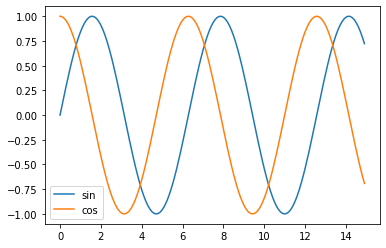

In [46]:
fig, ax = plt.subplots()
#1つのサブプロットの中にグラフが2つ
ax.plot(x, y1, label='sin')
ax.plot(x, y2, label='cos')
#凡例
ax.legend()

#描画
plt.show()

### No.30

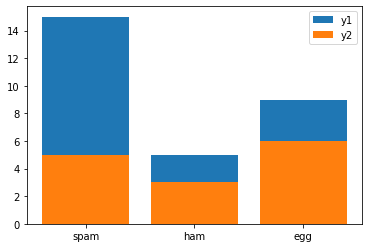

In [63]:
fig, axs = plt.subplots()

x = [1, 2, 3]
y1 = [10, 2, 3]
y2 = [5, 3, 6]
labels = ['spam', 'ham', 'egg']

#処理が1行で描かれている
#zipでy1, y2のデータをまとめる
#forで順に取り出して足した結果をy_totalに格納 [15, 5, 9]
y_total = [num1+num2 for num1, num2 in zip(y1,y2)]

#1つ目の棒グラフ
#tick_labels: メモリのラベル
#label: 凡例用ラベル
axs.bar(x, y_total, tick_label=labels, label='y1')
#2つ目の棒グラフ。上に積み上げられる
axs.bar(x, y2, label='y2')
#凡例表示
axs.legend()

plt.show()

In [64]:
y_total = [num1+num2 for num1, num2 in zip(y1,y2)]
y_total

[15, 5, 9]

### No.31

51.53-55.62 2.0
55.62-59.70 3.0
59.70-63.78 6.0
63.78-67.86 7.0
67.86-71.94 16.0
71.94-76.02 29.0
76.02-80.11 37.0
80.11-84.19 65.0
84.19-88.27 57.0
88.27-92.35 90.0
92.35-96.43 105.0
96.43-100.51 115.0
100.51-104.59 116.0
104.59-108.68 78.0
108.68-112.76 74.0
112.76-116.84 77.0
116.84-120.92 42.0
120.92-125.00 41.0
125.00-129.08 21.0
129.08-133.17 10.0
133.17-137.25 4.0
137.25-141.33 2.0
141.33-145.41 2.0
145.41-149.49 0.0
149.49-153.57 1.0


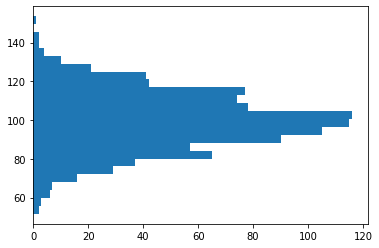

In [79]:
np.random.seed(123)
mu = 100
sigma = 15

#正規分布に従う乱数の生成(1000件)
#1つ目引数:平均値(mu)
#2つ目引数: 標準偏差(sigma)
#3つ目引数: 出力件数
x = np.random.normal(mu, sigma, 1000)

#サブプロット
fig, axs = plt.subplots()
#[ヒストグラム]
#bins: 棒の数(デフォルトは10)
#orientation = 'horizontal': 横向きのヒストグラム(指定しなければ縦向きなので、このまま覚える)
#[戻り値]
#n: 度数(ここでは乱数の個数。25個)
#bins: 区切り位置の値(binsの数＋一番端の区切り位置、で26個)
#patches: リスト(それぞれのbinsの描画に必要な情報が格納されている)
n, bins, patches = axs.hist(x, bins=25, orientation='horizontal')
#度数分布表の表示(histの第１引数とbinsを指定すると表示できる。この形で覚える)
#enumerate: indexと度数を取得する。indexと要素がわかっている時には使用できる関数
#numは度数
for i, num in enumerate(n):
    print('{:.2f}-{:.2f} {}'.format(bins[i], bins[i+1], num))

plt.show()

### No.32

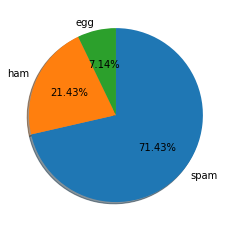

In [89]:
labels = ['spam', 'ham', 'egg']
x = [10, 3, 1]

fig, axs = plt.subplots()
#円グラフ
#startangle=90: 上から描画を始める(デフォルトは右)
#counterclock: 要素を配置する順番。Trueが反時計回り(デフォルト)、Falseは時計回り
#shadow:影と
#autopct: 値のパーセント表示。何桁まで表示するかを指定できる
axs.pie(x, labels=labels, startangle=90, counterclock=False, shadow=True, autopct='%1.2f%%')

plt.show()

### No.36

In [34]:
#*線状回帰を行う*

from sklearn.linear_model import LinearRegression #線状回帰の実行
from sklearn.datasets import load_boston          #ボストン住宅価格データセット
from sklearn.model_selection import train_test_split

#ボストン住宅価格データセットの読み込み
#このデータセットを用いて、ボストン近郊住宅地における1970年代の住宅価格を、各地域の情報から推測する
boston = load_boston()

#dataフィールド: ボストン近郊の地域毎に犯罪発生率、部屋数、高速道路への利便性などのデータ
#targetフィールド: ボストン近郊の地域毎の住宅価格の中央値
#X: 説明変数。地域毎の情報
#y: 目的変数。住宅価格
X, y = boston.data, boston.target

#データ分割
#test_size: テストデータの割合(ここでは３割→学習データは７割となる)
#random_state: シード値
#X_train: 説明変数の学習データ
#X_test: 説明変数のテストデータ
#y_train: 目的変数の学習データ
#y_test: 目的変数のテストデータ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

#LinearRegressionのインスタンス生成
lr = LinearRegression()
#回帰モデル構築(学習データを与える)
lr.fit(X_train, y_train)
#予測される住宅価格(テストデータを与える)
y_pred = lr.predict(X_test)

In [35]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

### No.39

In [3]:
#*分類モデル*
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV #ハイパーパラメータ(今回は決定木の深さ)を最適化
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
#data: アイリスの花情報
#target: 花の種類
X, y = iris.data, iris.target

#データ分割
#train_test_split
#第１引数: 説明変数
#第2引数: 目的変数
#test_size: テストデータの割合(ここでは３割→学習データは７割となる)
#random_state: シード値
#戻り値
#X_train: 説明変数の学習データ
#X_test: 説明変数のテストデータ
#y_train: 目的変数の学習データ
#y_test: 目的変数のテストデータ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

#DecisionTreeClassifierのインスタンス生成
clf = DecisionTreeClassifier()

#辞書データ
#決定木の深さの候補
param_grid = {'max_depth': [3, 4, 5]}

#GridSearchCVのインスタンス生成
#第1引数: 決定木
#第2引数: 決定木の深さの候補
#cv: 交差検証の手段(今回は10分割)→最適な決定木の深さは毎回変わる
cv = GridSearchCV(clf, param_grid=param_grid, cv=10)
#fitメソッド: 学習データを与える
#cv: 学習させた分類モデルを構築
cv.fit(X_train, y_train)
#花の情報のテストデータを与え、予測される花の種類(目的変数)を取得
y_pred = cv.predict(X_test)

In [54]:
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])